# Project 2 #

In [12]:
import numpy as np
from numpy import linalg as la
from __future__ import division

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/jrpl/anaconda2/envs/nuc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
def set_matrix(nodes=5, D=1./(3.*3.62e-2), sigma_a=0.15, w=10.):
    n = nodes - 1
    dx = w / n
    offdiag = -D / dx**2
    matrix = np.eye(n) * (sigma_a + 2. * D / dx**2)
    matrix[0][0] = 0.5 * sigma_a + D / dx**2
    for i in range(n)[1:-1]:
        matrix[i][i-1] = offdiag
        matrix[i][i+1] = offdiag
    matrix[0][1] = offdiag
    matrix[n-1][n-2] = offdiag
    
    nusig = 0.157
    S = np.resize(np.array([nusig]), (n))
    S[0] = S[0] * 0.5
    
    return (matrix, S)

In [6]:
def flux(nodes, width, sigma_a, sigma_f, sigma_tr, e_max=0.001, max_iterations=1e5):
    D = 1. / (3. * sigma_tr)
    A, S = set_matrix(nodes=nodes, w=width, D=D, sigma_a=sigma_a)
    b = np.ones_like(S) * 0.01
    
    k_error = 100
    b_error = 100
    
    num_iterations = 0
    
    k = 1.0
    
    while k_error > e_max or b_error > e_max and num_iterations < max_iterations:
        b = (np.multiply(b, S) / k) / la.norm(np.multiply(b, S) / k)

        b_old = b
        k_old = k

        b = la.solve(A, b)

        m = la.norm(b)
        m_old = la.norm(b_old)
        
        k = m / m_old

        k_error = (k - k_old) / k

        b_error = np.linalg.norm(b - b_old) / (nodes - 1)

        num_iterations += 1
        
        #print num_iterations, b, k
    return np.append(b, 0), k

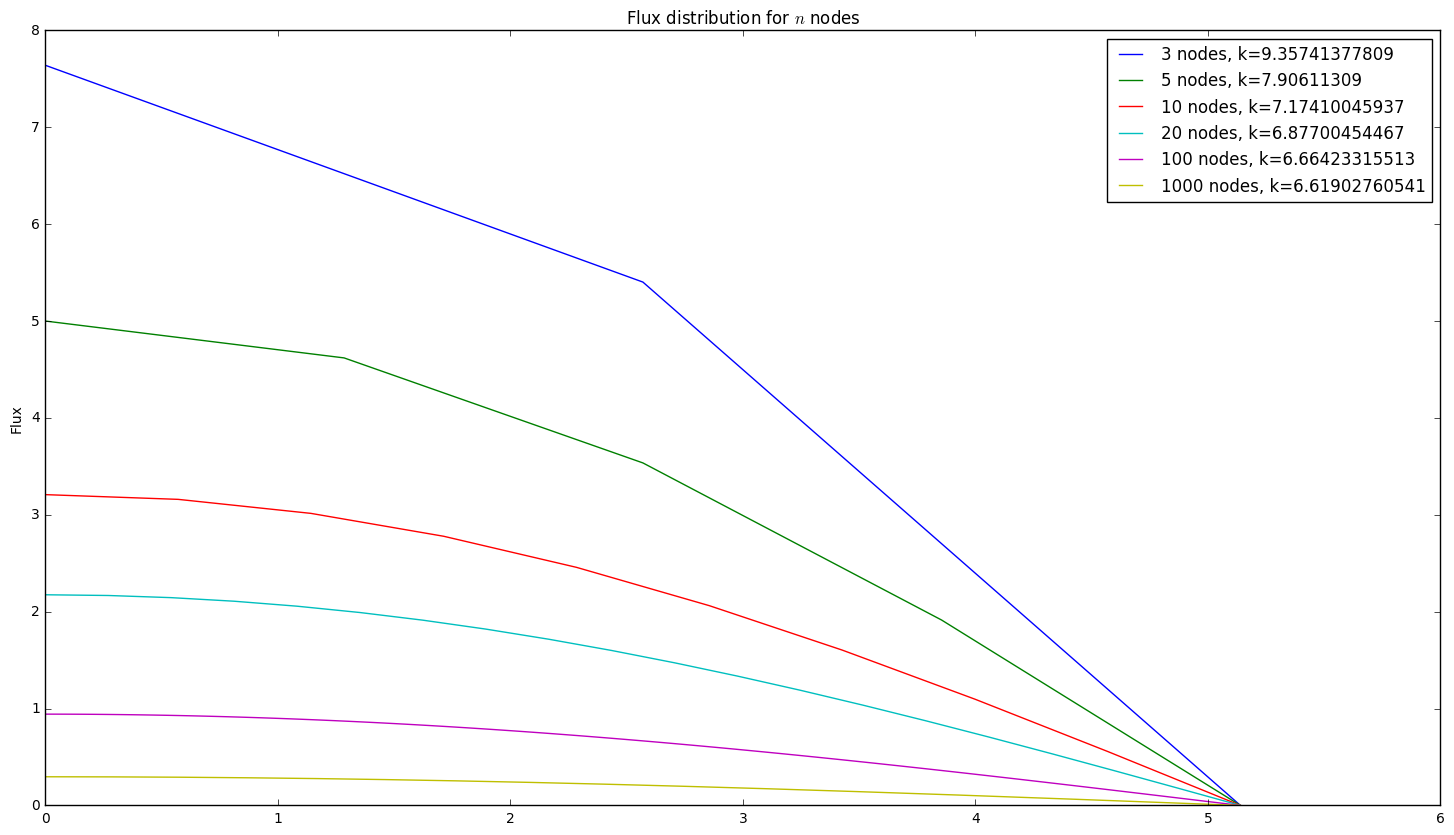

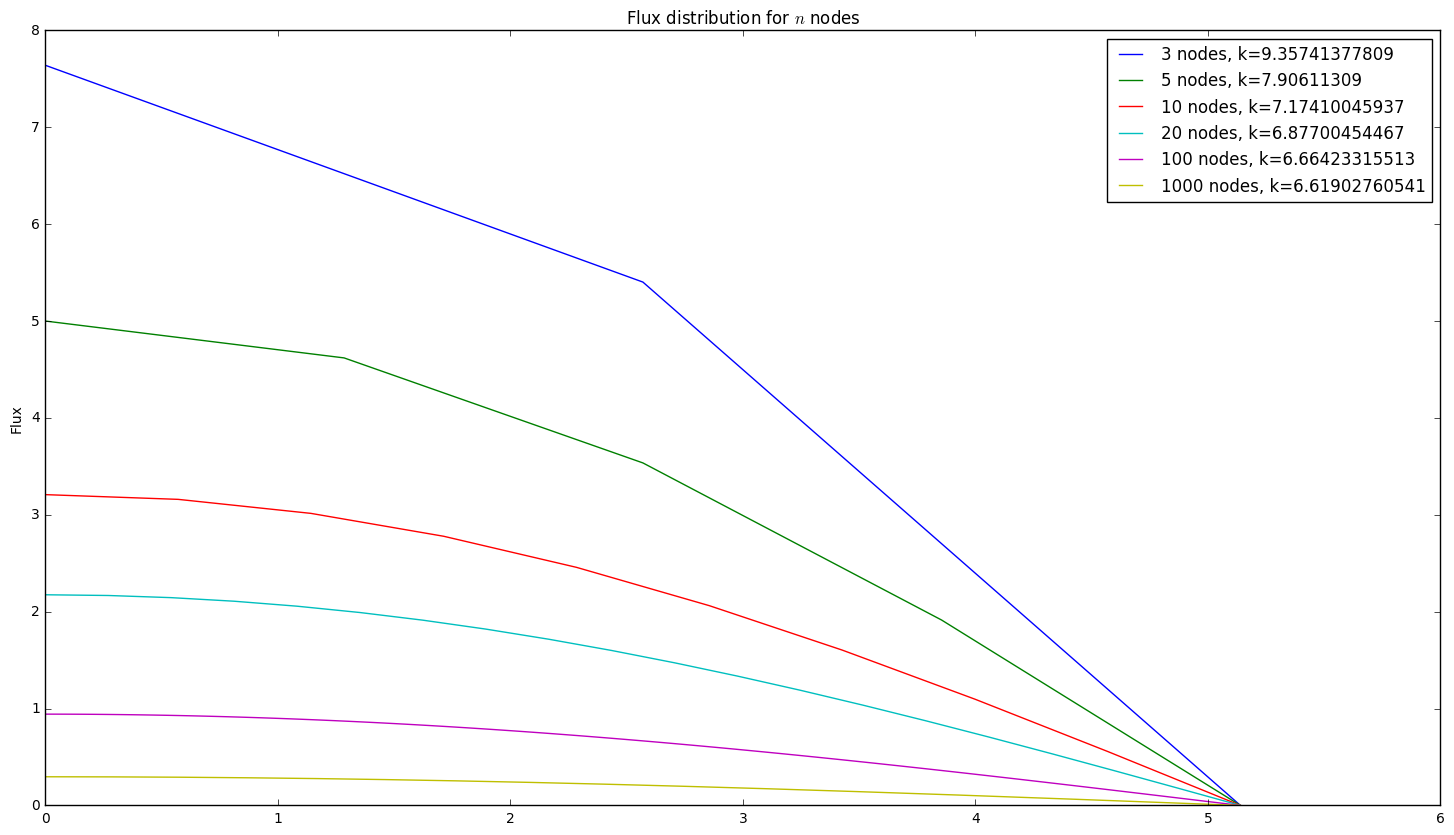

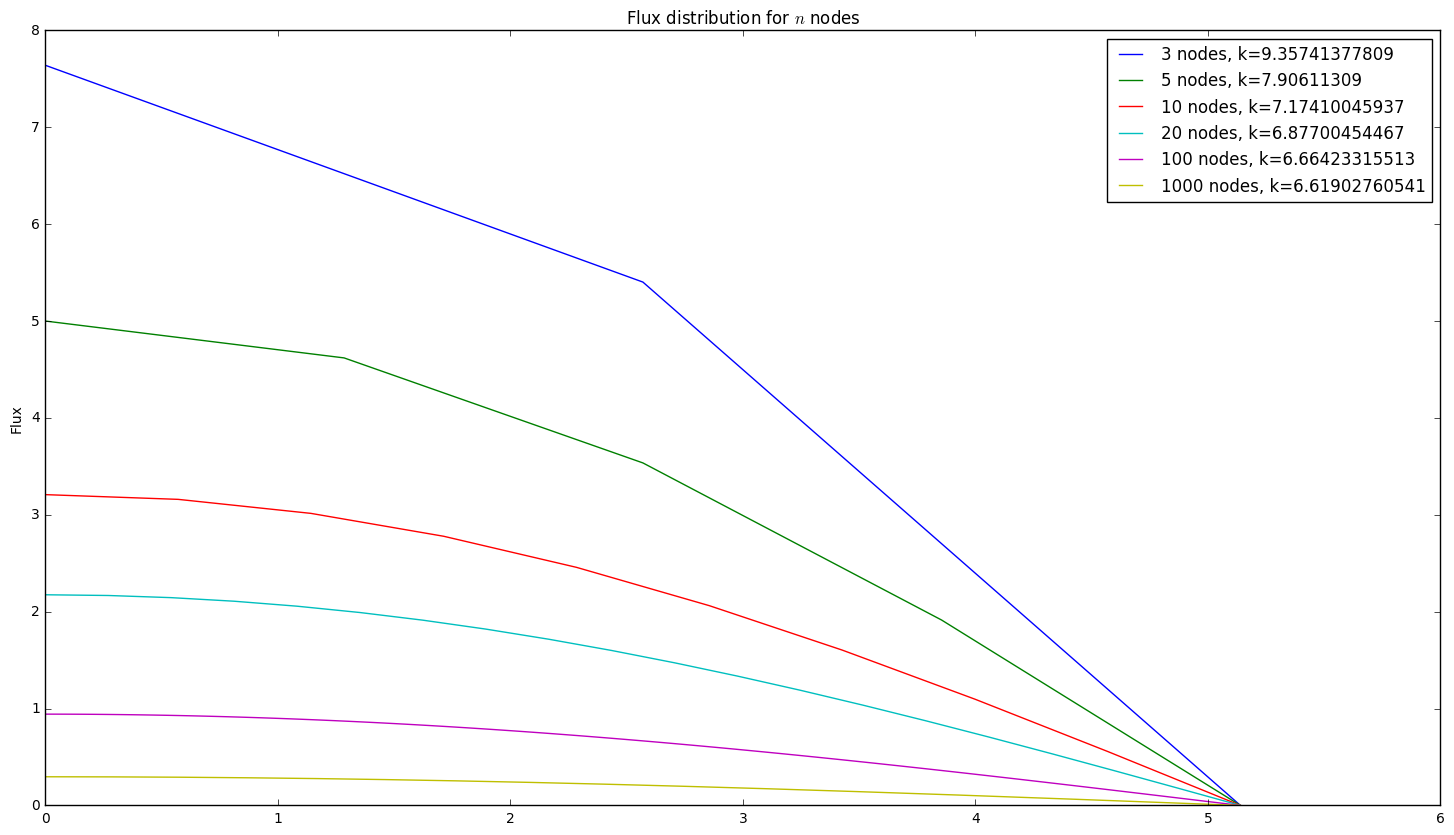

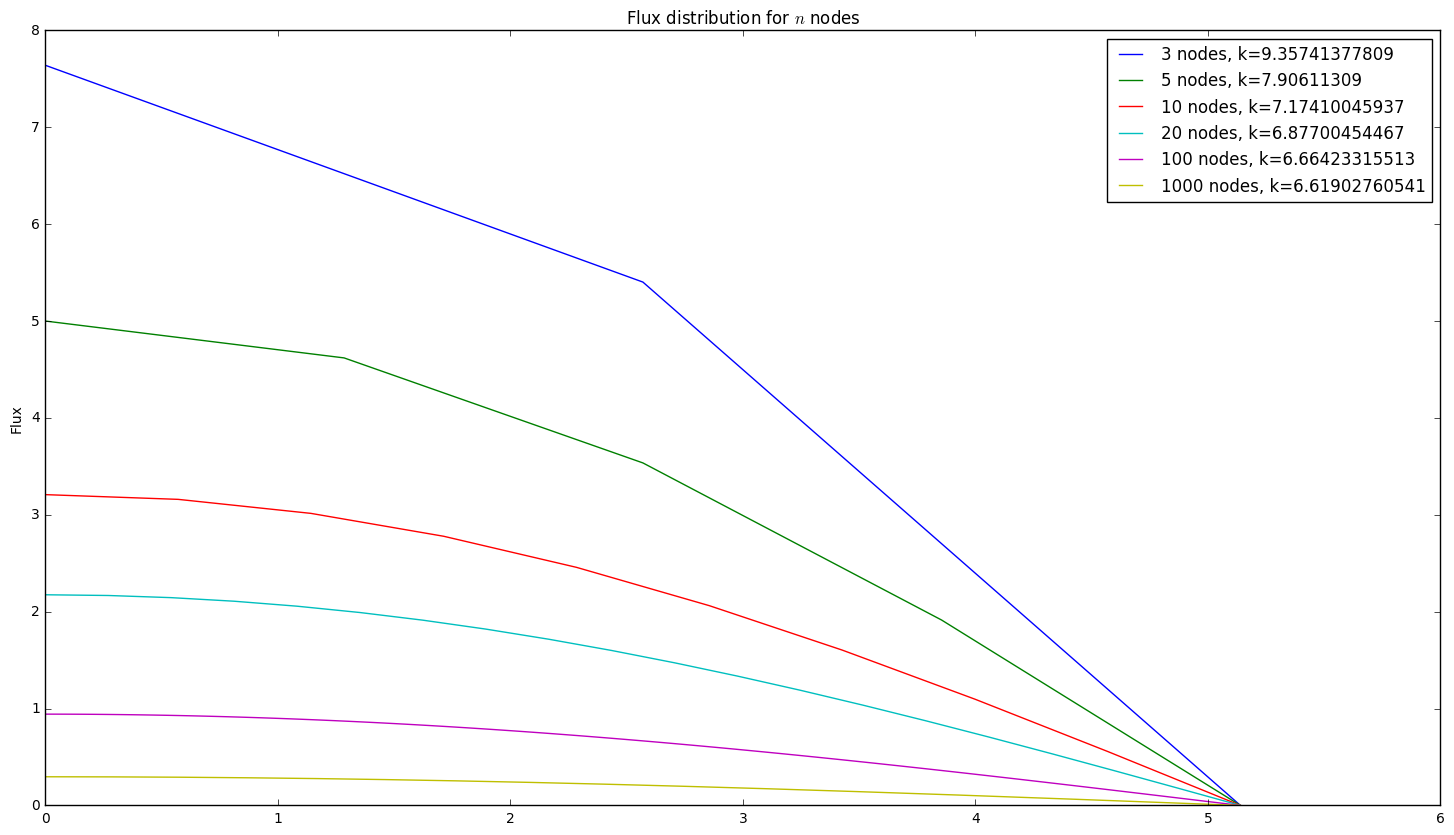

1 loop, best of 3: 38min 42s per loop


In [16]:
%%timeit
width = 18
height = 10
plt.figure(figsize=(width, height))
for i in [3, 5, 10, 20, 100, 1000]:
    f, k = flux(i, 138., 0.15, .15, 3.62e-2)
    plt.plot(np.linspace(0, 5.14, i), f, label="{0} nodes, k={1}".format(i, k))
plt.legend(loc="upper right")
plt.title(r'Flux distribution for $n$ nodes')
plt.ylabel("Flux")
plt.savefig("images/flux distribution for n nodes", dpi=500)
plt.show()

In [18]:
def flux2(nodes, width, sigma_a, sigma_f, sigma_tr, e_max=0.001, max_iterations=1e5):
    D = 1. / (3. * sigma_tr)
    A, S = set_matrix(nodes=nodes, w=width, D=D, sigma_a=sigma_a)
    A = np.linalg.inv(A)
    b = np.ones_like(S) * 0.01
    
    k_error = 100
    b_error = 100
    
    num_iterations = 0
    
    k = 1.0
    
    while k_error > e_max or b_error > e_max and num_iterations < max_iterations:
        b = (np.multiply(b, S) / k) / la.norm(np.multiply(b, S) / k)

        b_old = b
        k_old = k

        b = A.dot(b)

        m = la.norm(b)
        m_old = la.norm(b_old)
        
        k = m / m_old

        k_error = (k - k_old) / k

        b_error = np.linalg.norm(b - b_old) / (nodes - 1)

        num_iterations += 1
        
        #print num_iterations, b, k
    return np.append(b, 0), k

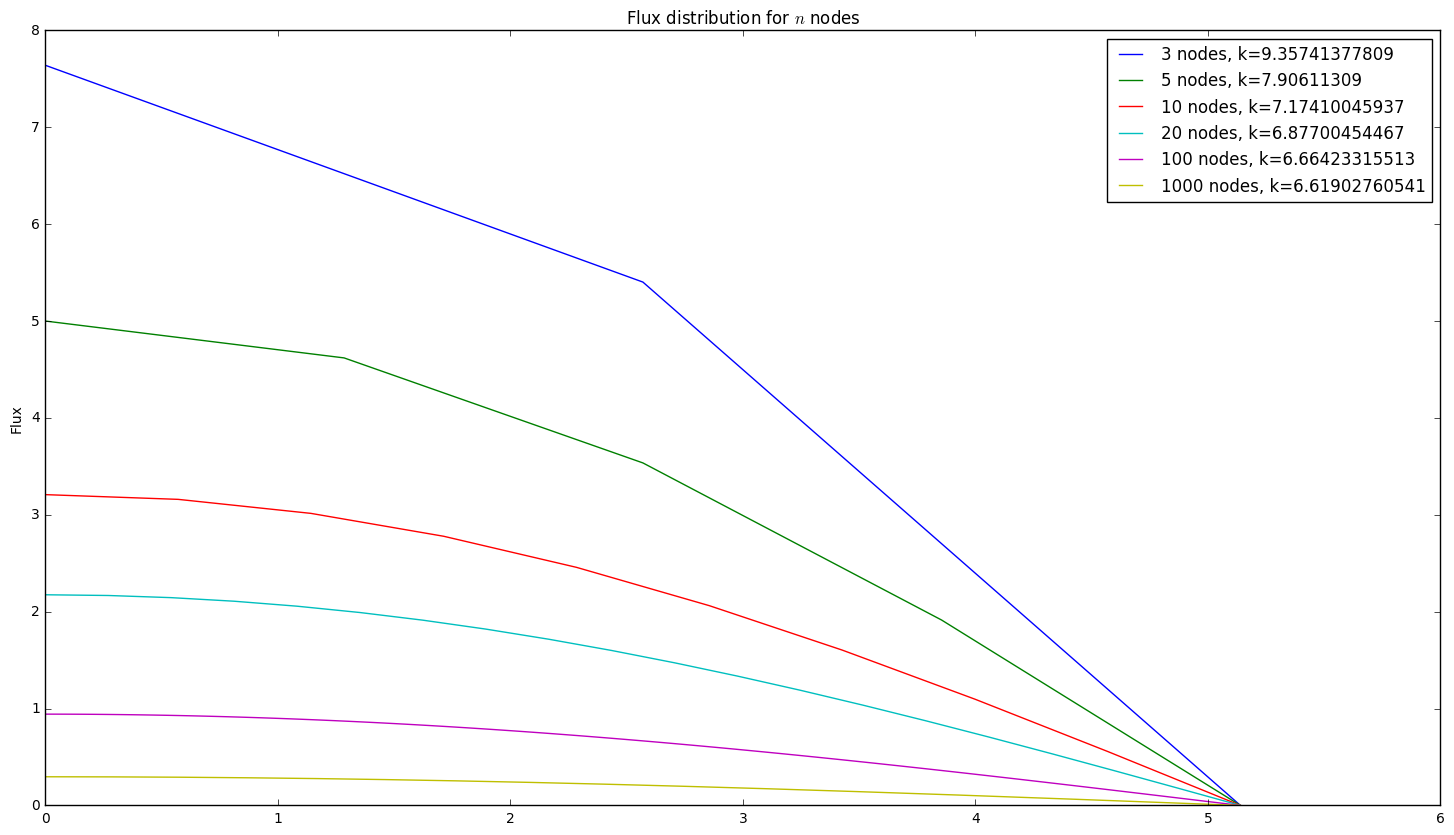

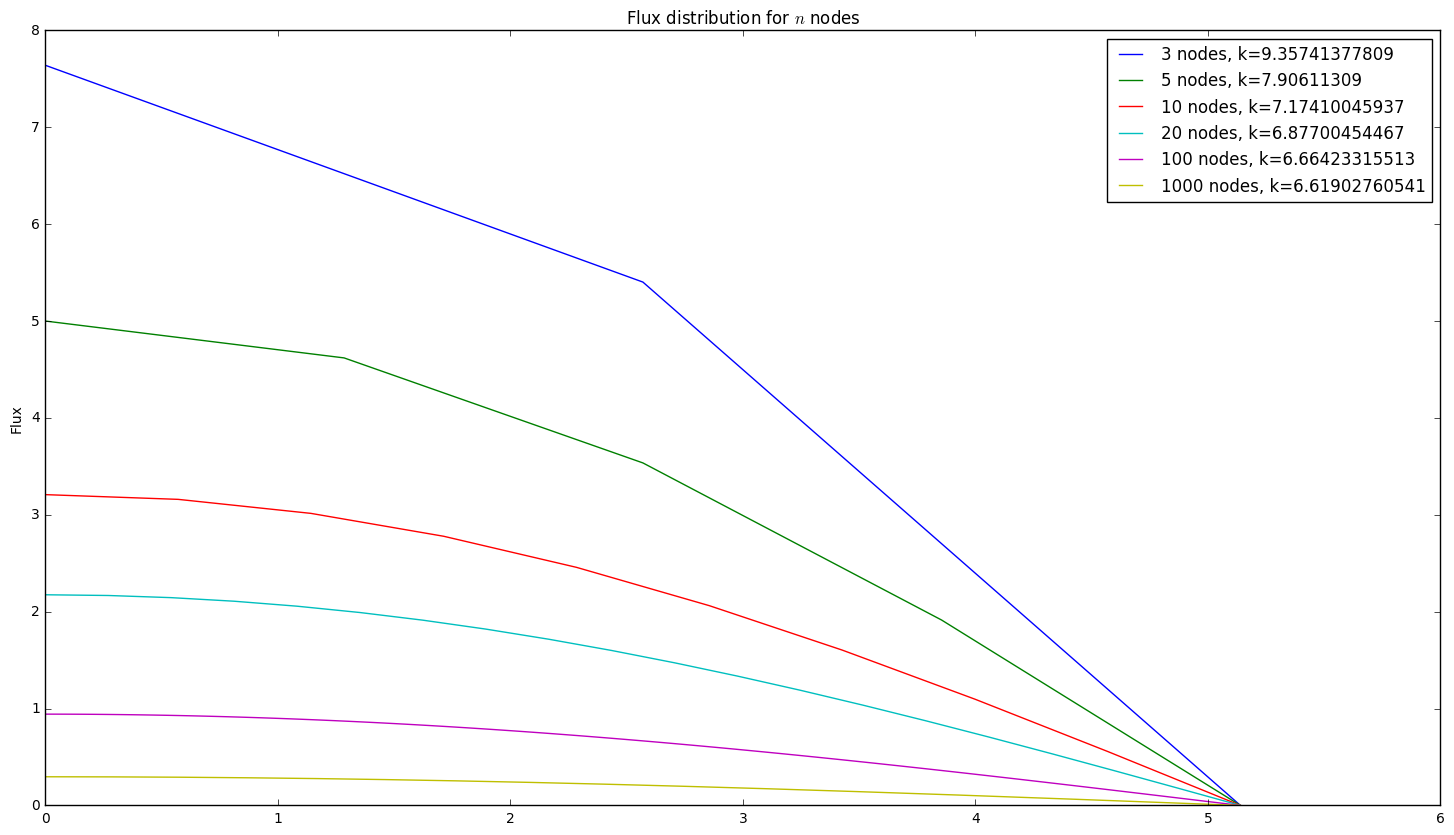

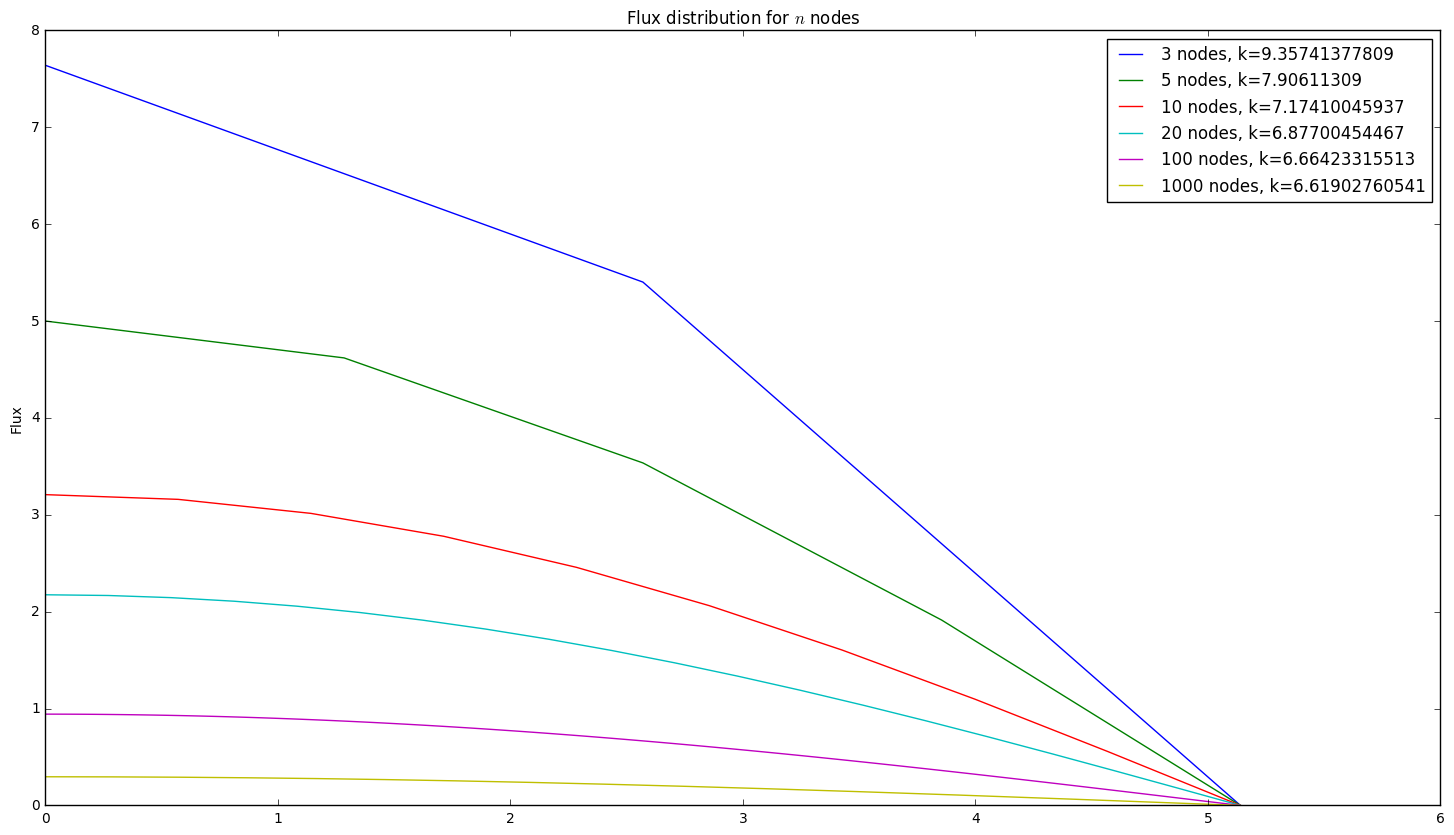

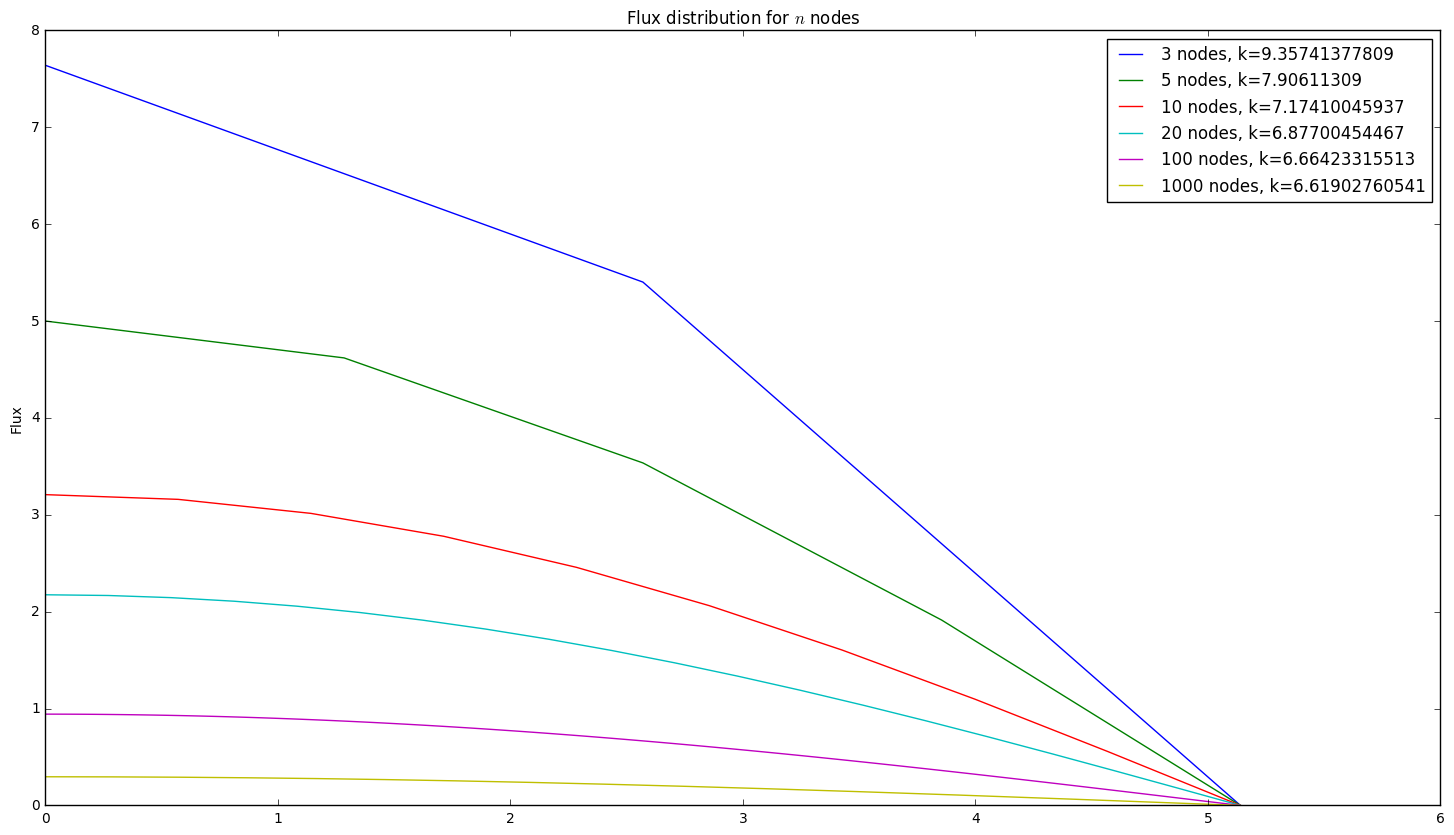

1 loop, best of 3: 58.5 s per loop


In [19]:
%%timeit
width = 18
height = 10
plt.figure(figsize=(width, height))
for i in [3, 5, 10, 20, 100, 1000]:
    f, k = flux2(i, 138., 0.15, .15, 3.62e-2)
    plt.plot(np.linspace(0, 5.14, i), f, label="{0} nodes, k={1}".format(i, k))
plt.legend(loc="upper right")
plt.title(r'Flux distribution for $n$ nodes')
plt.ylabel("Flux")
plt.savefig("images/flux distribution for n nodes inverse method", dpi=500)
plt.show()

In [20]:
from numba import jit

In [21]:
@jit
def flux_numba(nodes, width, sigma_a, sigma_f, sigma_tr, e_max=0.001, max_iterations=1e5):
    D = 1. / (3. * sigma_tr)
    A, S = set_matrix(nodes=nodes, w=width, D=D, sigma_a=sigma_a)
    b = np.ones_like(S) * 0.01
    
    k_error = 100
    b_error = 100
    
    num_iterations = 0
    
    k = 1.0
    
    while k_error > e_max or b_error > e_max and num_iterations < max_iterations:
        b = (np.multiply(b, S) / k) / la.norm(np.multiply(b, S) / k)

        b_old = b
        k_old = k

        b = la.solve(A, b)

        m = la.norm(b)
        m_old = la.norm(b_old)
        
        k = m / m_old

        k_error = (k - k_old) / k

        b_error = np.linalg.norm(b - b_old) / (nodes - 1)

        num_iterations += 1
        
        #print num_iterations, b, k
    return np.append(b, 0), k

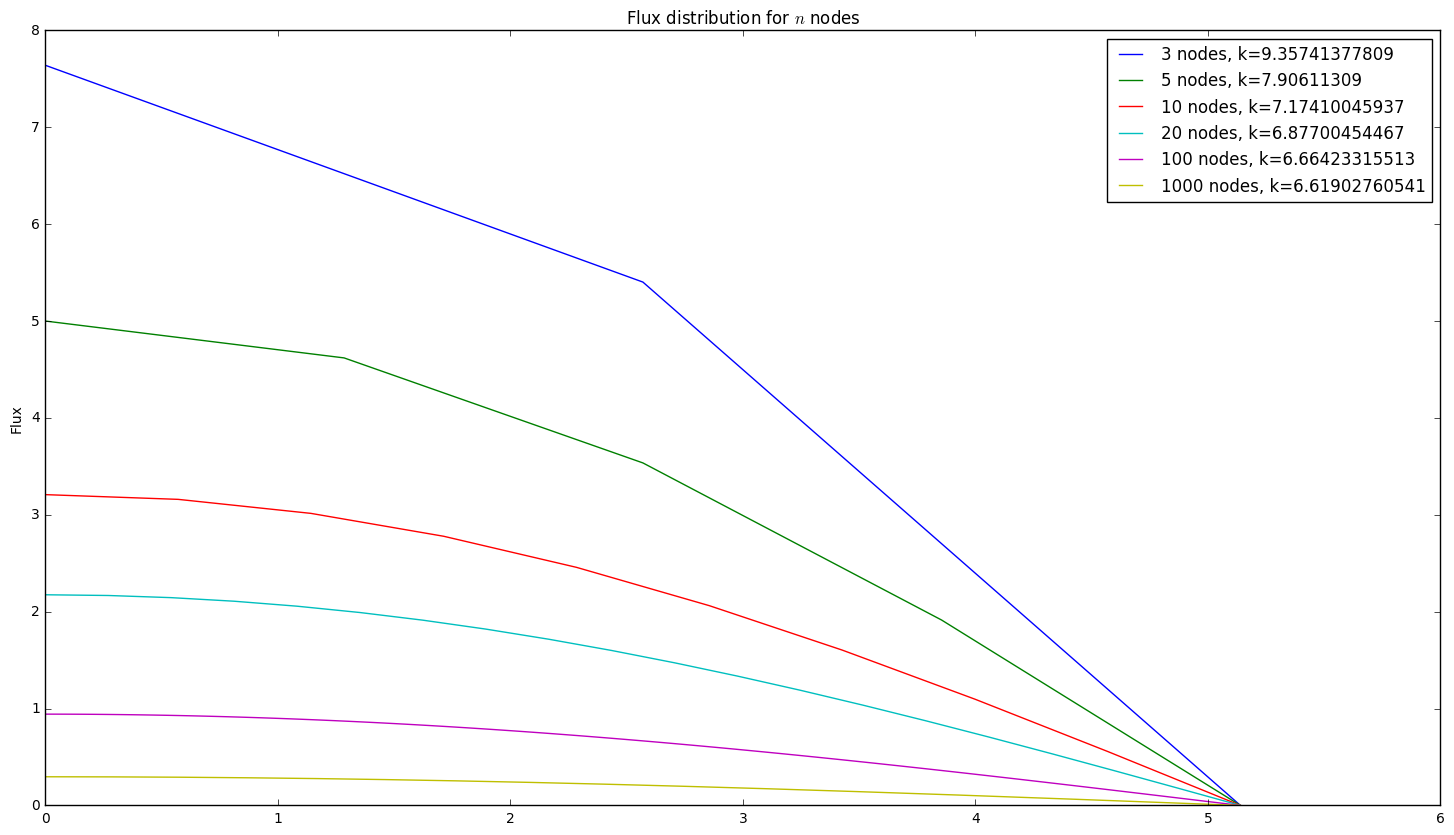

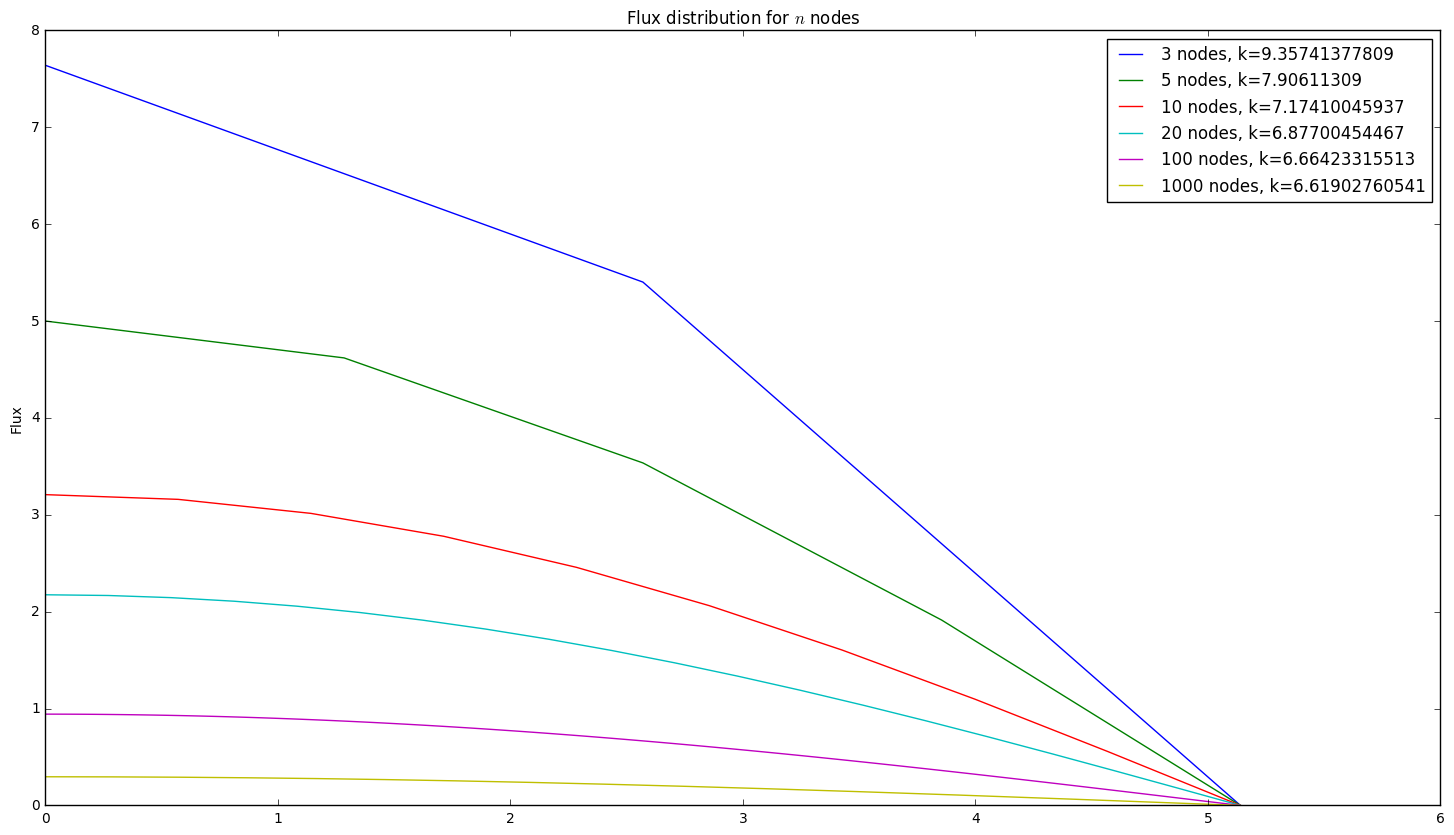

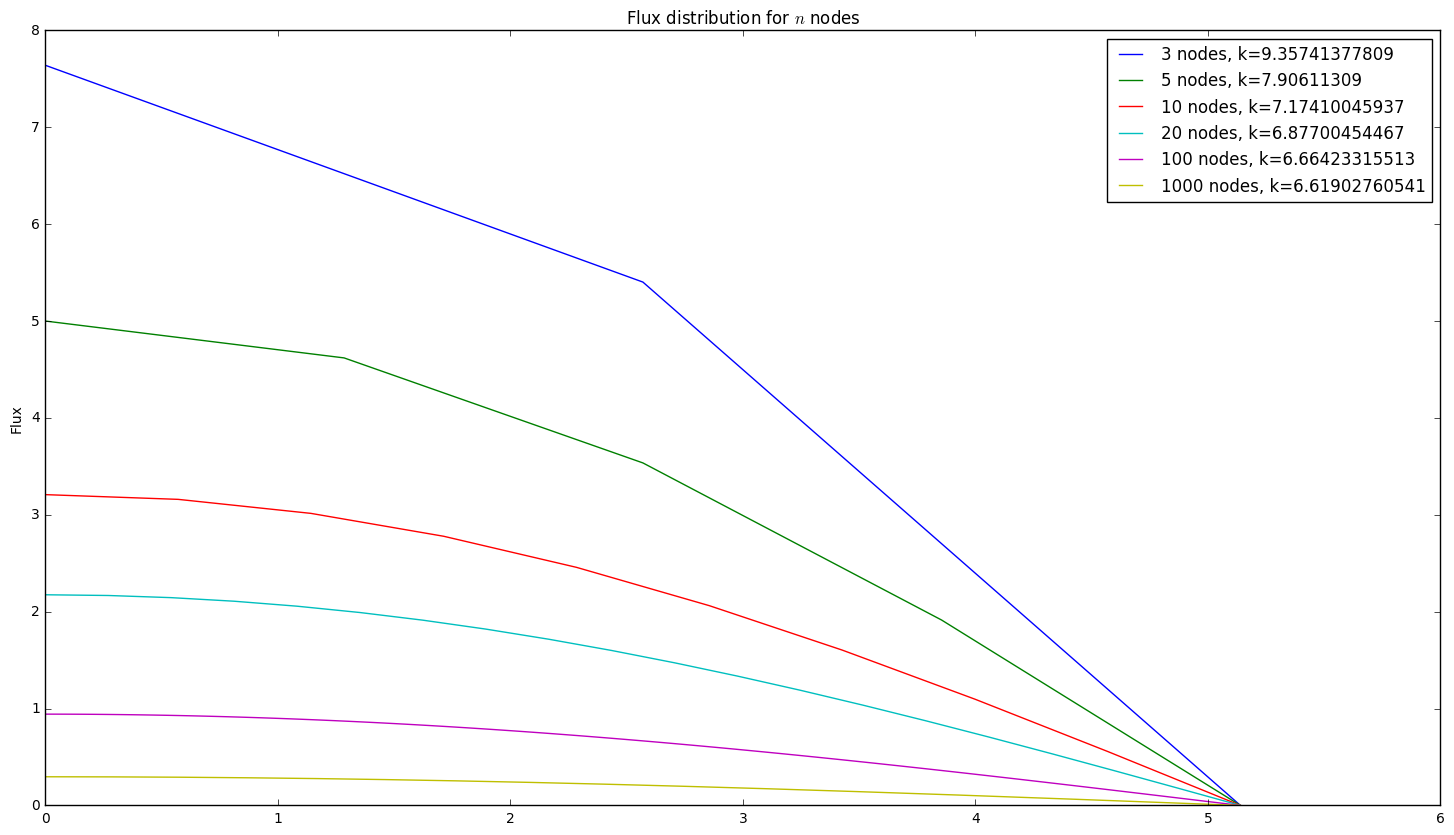

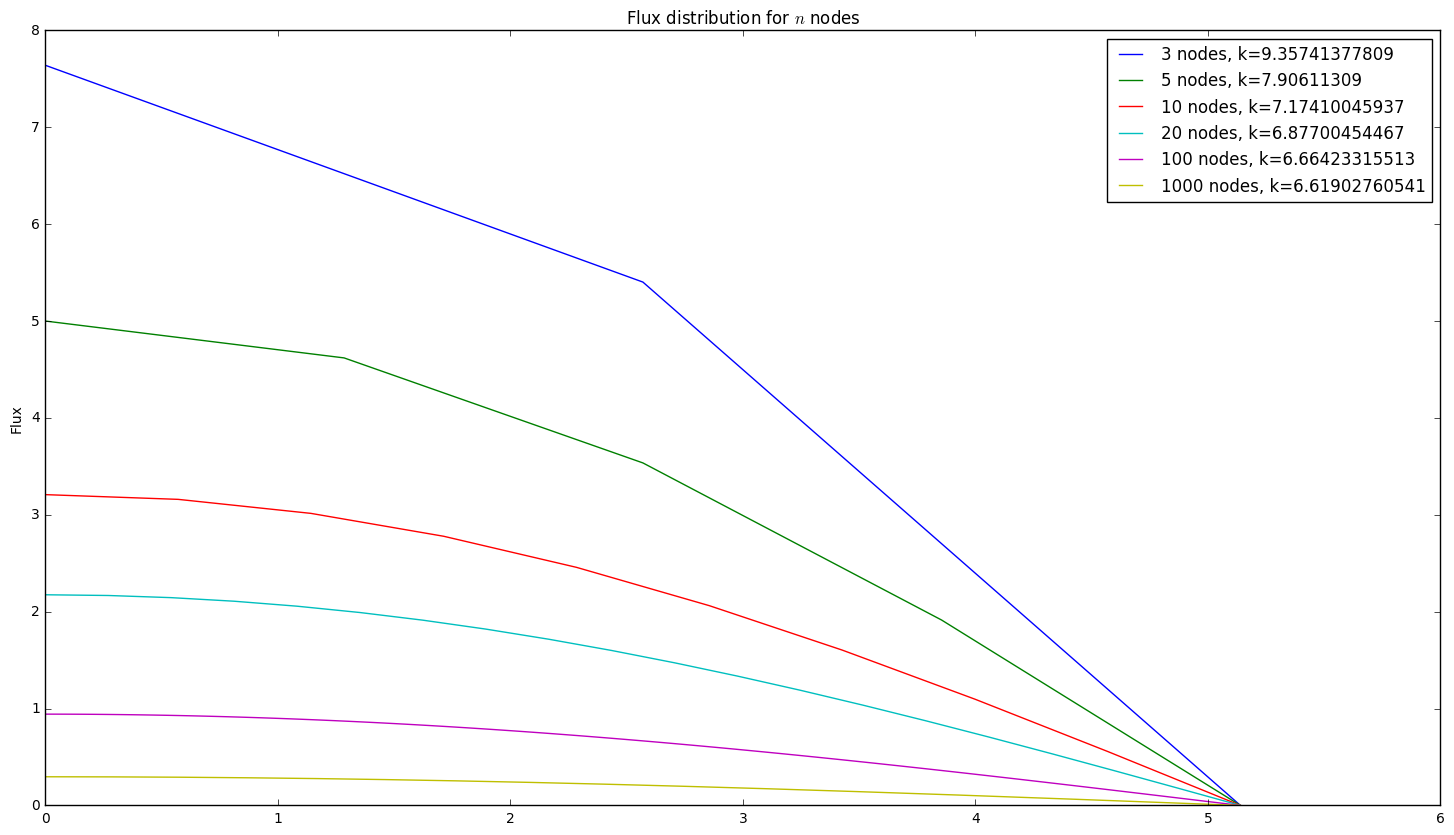

1 loop, best of 3: 41min 51s per loop


In [22]:
%%timeit
width = 18
height = 10
plt.figure(figsize=(width, height))
for i in [3, 5, 10, 20, 100, 1000]:
    f, k = flux_numba(i, 138., 0.15, .15, 3.62e-2)
    plt.plot(np.linspace(0, 5.14, i), f, label="{0} nodes, k={1}".format(i, k))
plt.legend(loc="upper right")
plt.title(r'Flux distribution for $n$ nodes')
plt.ylabel("Flux")
plt.savefig("images/flux distribution for n nodes inverse method", dpi=500)
plt.show()

In [23]:
@jit
def flux2_numba(nodes, width, sigma_a, sigma_f, sigma_tr, e_max=0.001, max_iterations=1e5):
    D = 1. / (3. * sigma_tr)
    A, S = set_matrix(nodes=nodes, w=width, D=D, sigma_a=sigma_a)
    A = np.linalg.inv(A)
    b = np.ones_like(S) * 0.01
    
    k_error = 100
    b_error = 100
    
    num_iterations = 0
    
    k = 1.0
    
    while k_error > e_max or b_error > e_max and num_iterations < max_iterations:
        b = (np.multiply(b, S) / k) / la.norm(np.multiply(b, S) / k)

        b_old = b
        k_old = k

        b = A.dot(b)

        m = la.norm(b)
        m_old = la.norm(b_old)
        
        k = m / m_old

        k_error = (k - k_old) / k

        b_error = np.linalg.norm(b - b_old) / (nodes - 1)

        num_iterations += 1
        
        #print num_iterations, b, k
    return np.append(b, 0), k

In [ ]:
%%timeit
width = 18
height = 10
plt.figure(figsize=(width, height))
for i in [3, 5, 10, 20, 100, 1000]:
    f, k = flux2_numba(i, 138., 0.15, .15, 3.62e-2)
    plt.plot(np.linspace(0, 5.14, i), f, label="{0} nodes, k={1}".format(i, k))
plt.legend(loc="upper right")
plt.title(r'Flux distribution for $n$ nodes')
plt.ylabel("Flux")
plt.savefig("images/flux distribution for n nodes inverse method", dpi=500)
plt.show()